In [185]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [166]:
def daterange(start_date, end_date):
    for i in range(int((end_date - start_date).days)):
         yield start_date + datetime.timedelta(i)

## Exemplo com Adamantina

In [215]:
dataframe = pd.read_csv('../normalizados/dados/3500105.csv')
dataframe

,Unnamed: 0,Município,Código IBGE,Populacao,Total 1ª Dose,Total 2ª Dose,Total Unica,Total Doses Aplicadas,População Vacinada dose1/População Total,População Vacinada/População Total,data,diagnostico_covid19,obito,media_movel_casos,media_movel_obitos,ocupacao_leitos,media_isolamento,Mean.R
0,0,ADAMANTINA,3500105.0,35111.0,0.000000,0.067900,0.0,0.000000,0.000000,0.062927,2021-02-21,0.25000,0.5,0.568966,0.444444,0.437308,0.462963,0.0
1,1,ADAMANTINA,3500105.0,35111.0,0.000559,0.068401,0.0,0.000540,0.000559,0.063391,2021-02-22,0.65625,0.5,0.620690,0.444444,0.452059,0.037037,0.0
2,2,ADAMANTINA,3500105.0,35111.0,0.001829,0.076029,0.0,0.003638,0.001829,0.070460,2021-02-23,0.31250,0.0,0.482759,0.444444,0.466810,0.111111,0.0
3,3,ADAMANTINA,3500105.0,35111.0,0.002134,0.076904,0.0,0.004106,0.002134,0.071271,2021-02-24,0.21875,0.5,0.431034,0.444444,0.437308,1.000000,0.0
4,4,ADAMANTINA,3500105.0,35111.0,0.002896,0.092410,0.0,0.009112,0.002896,0.085641,2021-02-25,0.12500,0.5,0.275862,0.555556,0.351875,0.092593,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,144,ADAMANTINA,3500105.0,35111.0,0.976066,0.988621,1.0,0.979759,0.976066,0.989454,2021-07-15,0.18750,0.0,0.198276,0.111111,0.110633,0.185185,0.0
145,145,ADAMANTINA,3500105.0,35111.0,0.990447,0.996374,1.0,0.992184,0.990447,0.996639,2021-07-16,0.09375,0.0,0.163793,0.111111,0.226490,0.074074,0.0
146,146,ADAMANTINA,3500105.0,35111.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,2021-07-17,0.00000,0.0,0.060345,0.000000,0.092502,0.259259,0.0
147,147,ADAMANTINA,3500105.0,35111.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,2021-07-18,0.06250,0.0,0.034483,0.000000,0.000000,0.611111,0.0


In [198]:
#leitura
y_data = []
x_data = []

#quantidade de dias para o deslocamento
dias = 0

for x in range(dias, dataframe.shape[0]):
    aux = dataframe.loc[x][['media_movel_casos', 'media_movel_obitos', 'ocupacao_leitos','media_isolamento', 'Mean.R', 'obito']]
    x_data.append(aux.values.tolist())
    y_data.append(dataframe.loc[x]['diagnostico_covid19'].tolist())
    
x_data = np.array(x_data)
y_data = np.array(y_data)

In [199]:
y_pred = []
y_true = []

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

for i in range(0, len(y_data)):
    y_pred.append(model.predict([x_data[i]]).reshape(1, -1)[0])
    
y_pred = np.array(y_pred)
y_true = np.array(y_true)

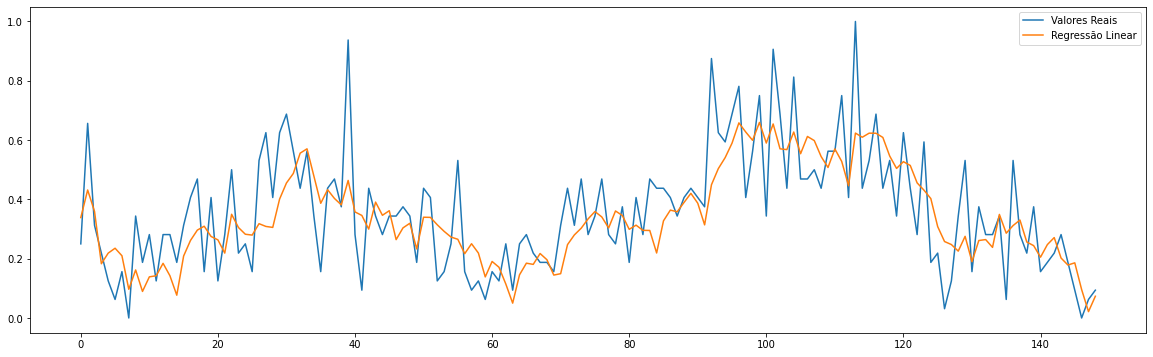

In [200]:
plt.figure(figsize=(20, 6))
plt.plot(y_data, label='Valores Reais')
plt.plot(y_pred, label='Regressão Linear')
#plt.plot(dataframe['media_movel_casos'], label='Regressão Linear')
plt.legend()
plt.show()

In [178]:
dataframe = pd.read_csv('../normalizados/dados/3500105.csv')


y_data = []
x_data = []

#quantidade de dias para o deslocamento
dias = 6

for x in range(dias, dataframe.shape[0]):
    aux = dataframe.loc[x - dias:x]['media_movel_casos']
    x_data.append(aux.values.tolist())
    y_data.append(dataframe.loc[x]['diagnostico_covid19'].tolist())
    
x_data = np.array(x_data)
y_data = np.array(y_data)



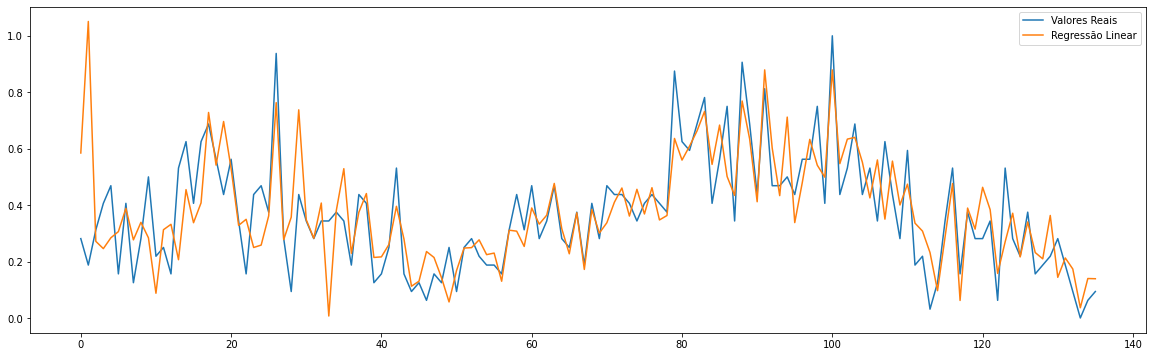

In [179]:
y_pred = []
y_true = []

for i in range(7, len(y_data)):
    x_train = x_data[:i][:]
    y_train = y_data[:i]

    x_test = x_data[i][:]
    y_test = y_data[i]

    model.fit(x_train, y_train)

    y_pred.append(model.predict([x_test]).reshape(1, -1)[0])
    y_true.append(y_test)


y_pred = np.array(y_pred)
y_true = np.array(y_true)

plt.figure(figsize=(20, 6))
plt.plot(y_true, label='Valores Reais')
plt.plot(y_pred, label='Regressão Linear')
plt.legend()
plt.show()

In [180]:
reg = LinearRegression()
scores = cross_val_score(reg, x_data, y_data, cv=5)

In [181]:
print(scores)

[0.55899826 0.59546855 0.75170011 0.41642073 0.51697714]


In [182]:
print(scores.mean()*100)

56.79129604623474


In [213]:
dataframe = pd.read_csv('../normalizados/dados/3500105.csv')

x = np.array(dataframe[['media_movel_casos', 'media_movel_obitos', 'ocupacao_leitos','media_isolamento', 'Mean.R', 'obito']].values.tolist())
y = np.array(dataframe['diagnostico_covid19'].values.tolist())

sel = SelectKBest(mutual_info_regression, k = 4)
sel.fit(x,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001C33DEAB310>)

In [214]:
sel.transform(x)

array([[0.56896552, 0.44444444, 0.43730793, 0.5       ],
       [0.62068966, 0.44444444, 0.452059  , 0.5       ],
       [0.48275862, 0.44444444, 0.46681008, 0.        ],
       [0.43103448, 0.44444444, 0.43730793, 0.5       ],
       [0.27586207, 0.55555556, 0.35187462, 0.5       ],
       [0.24137931, 0.44444444, 0.37799631, 0.        ],
       [0.24137931, 0.44444444, 0.46681008, 0.        ],
       [0.17241379, 0.33333333, 0.48432698, 0.        ],
       [0.0862069 , 0.22222222, 0.51382913, 0.        ],
       [0.05172414, 0.44444444, 0.60202827, 1.        ],
       [0.06896552, 0.33333333, 0.64597419, 0.        ],
       [0.06896552, 0.22222222, 0.62077443, 0.        ],
       [0.12931034, 0.22222222, 0.69022741, 0.        ],
       [0.1637931 , 0.33333333, 0.75199754, 0.5       ],
       [0.21551724, 0.44444444, 0.42624462, 0.5       ],
       [0.20689655, 0.55555556, 0.80977259, 0.5       ],
       [0.26724138, 0.33333333, 0.86662569, 0.        ],
       [0.31896552, 0.33333333,

In [212]:
x

array([[0.56896552, 0.44444444, 0.43730793, 0.46296296, 0.        ],
       [0.62068966, 0.44444444, 0.452059  , 0.03703704, 0.        ],
       [0.48275862, 0.44444444, 0.46681008, 0.11111111, 0.        ],
       [0.43103448, 0.44444444, 0.43730793, 1.        , 0.        ],
       [0.27586207, 0.55555556, 0.35187462, 0.09259259, 0.        ],
       [0.24137931, 0.44444444, 0.37799631, 0.        , 0.        ],
       [0.24137931, 0.44444444, 0.46681008, 0.22222222, 0.        ],
       [0.17241379, 0.33333333, 0.48432698, 0.77777778, 0.        ],
       [0.0862069 , 0.22222222, 0.51382913, 0.07407407, 0.        ],
       [0.05172414, 0.44444444, 0.60202827, 0.22222222, 0.        ],
       [0.06896552, 0.33333333, 0.64597419, 0.2037037 , 0.        ],
       [0.06896552, 0.22222222, 0.62077443, 0.2037037 , 0.        ],
       [0.12931034, 0.22222222, 0.69022741, 0.18518519, 0.        ],
       [0.1637931 , 0.33333333, 0.75199754, 0.5       , 0.        ],
       [0.21551724, 0.44444444, 0.